# Retail plotting

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import iplot

import plotly.io as pio
pio.renderers.default = "notebook"

import os
if not os.path.exists("images"):
    os.mkdir("images")
    
from IPython.display import Image

%load_ext autoreload
%autoreload 2


## Initial data processing

#### Load data

In [3]:
customers = pd.read_csv('data/customers.csv')
articles = pd.read_json('data/articles.json')
transactions = pd.read_csv('data/transactions.csv')

#### Explore the data

In [4]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [5]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,url,api_url
0,145872001,145872,Dorian l/s basic,252,Sweater,Garment Upper body,1010016,Solid,9,Black,...,Sport,26,Sport,22,Men H&M Sport,1005,Jersey Fancy,"Long-sleeved sports top in fast-drying, breath...",https://www2.hm.com/en_gb/productpage.01458720...,https://www2.hm.com/hmwebservices/service/arti...
1,145872037,145872,Dorian l/s basic,252,Sweater,Garment Upper body,1010010,Melange,8,Dark Grey,...,Sport,26,Sport,22,Men H&M Sport,1005,Jersey Fancy,"Long-sleeved sports top in fast-drying, breath...",https://www2.hm.com/en_gb/productpage.01458720...,https://www2.hm.com/hmwebservices/service/arti...
2,145872043,145872,Dorian l/s basic,252,Sweater,Garment Upper body,1010016,Solid,10,White,...,Sport,26,Sport,22,Men H&M Sport,1005,Jersey Fancy,"Long-sleeved sports top in fast-drying, breath...",https://www2.hm.com/en_gb/productpage.01458720...,https://www2.hm.com/hmwebservices/service/arti...
3,145872051,145872,Dorian l/s basic,254,Top,Garment Upper body,1010010,Melange,9,Black,...,Sport,26,Sport,22,Men H&M Sport,1005,Jersey Fancy,"Long-sleeved sports top in fast-drying, breath...",https://www2.hm.com/en_gb/productpage.01458720...,https://www2.hm.com/hmwebservices/service/arti...
4,145872052,145872,Dorian l/s basic,252,Sweater,Garment Upper body,1010010,Melange,73,Dark Blue,...,Sport,26,Sport,22,Men H&M Sport,1005,Jersey Fancy,"Long-sleeved sports top in fast-drying, breath...",https://www2.hm.com/en_gb/productpage.01458720...,https://www2.hm.com/hmwebservices/service/arti...


In [6]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


#### Restructure data
We restructure the data to connect *customers*, *articles* and *transactions*. 

In [ ]:
df = transactions.merge(articles, on='article_id').merge(customers, on='customer_id')

# Save for potential kernel interuption
df.to_csv('data/merged_df.csv')

In [2]:
# Read cached merge of data
df = pd.read_csv('data/merged_df.csv')

## Data insights

#### Customer Recurrence

Retaining cutomers are interesting from a data collection perspective. How does the retention graph look? Do we retain customers or are most shopping just a single time?

In [3]:
customer_transaction_counts = df["customer_id"].value_counts()
num_transactions_count = customer_transaction_counts.value_counts().sort_index()
part_transactions_count = num_transactions_count / len(customer_transaction_counts)


In [ ]:
# Plot number of customers per transaction count
upper_bin = 14
sum_above_upper_bin = part_transactions_count[part_transactions_count.index > upper_bin].sum()

fig = px.bar(
    x=np.arange(upper_bin + 1) + 1,
    y=[*part_transactions_count.values[:upper_bin], sum_above_upper_bin],
    labels={
        "x": "Number of Purchases",
        "y": "Share of Customers"
    },
    title="Customer Recurrence",
)
fig.update_layout(
    showlegend=False,
    xaxis=dict(
        tickmode='array',
        tickvals=np.arange(upper_bin + 1) + 1,
        ticktext=[str(i) for i in np.arange(upper_bin) + 1] +
        [f"{upper_bin + 1}+"],
    ),
    title={'xanchor': 'center', 'yanchor': 'top', 'x': 0.5}
)
# iplot(fig)
fig.write_image("images/customer_recurrence.png", width=1600/1.5, height=900/1.5, scale=4)


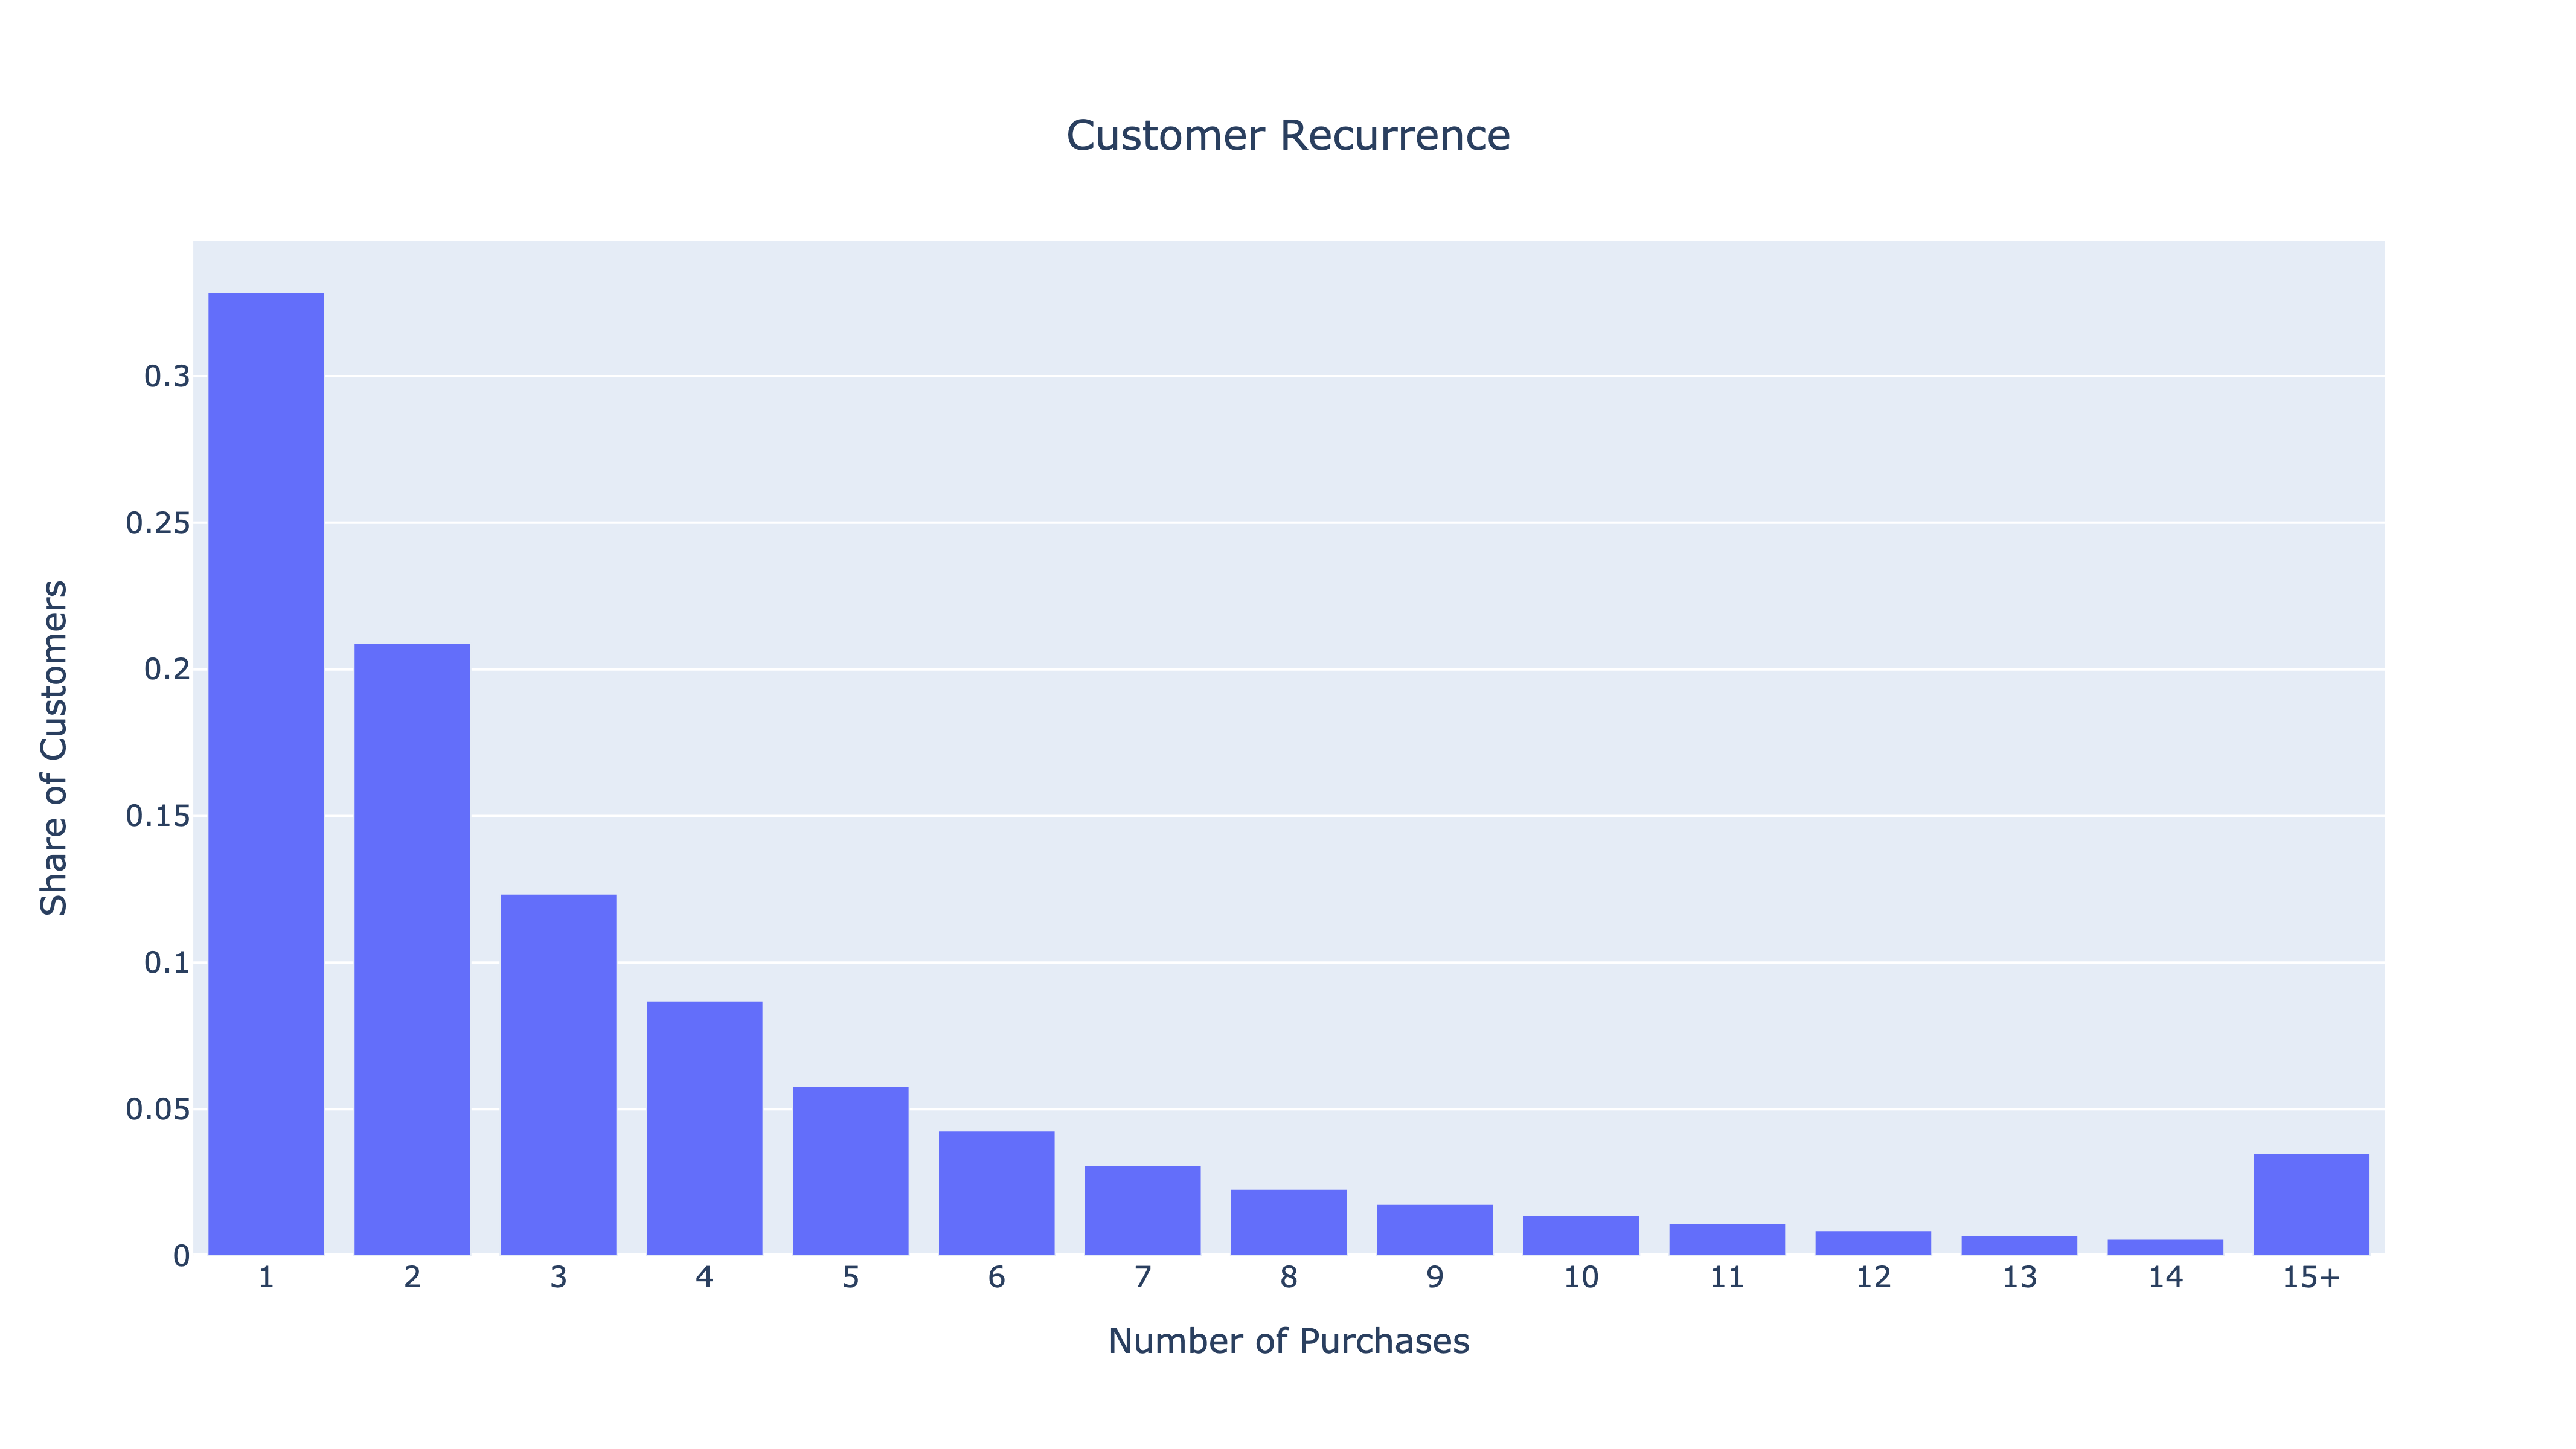

In [2]:
Image(filename='images/customer_recurrence.png')

#### Segmentations

In [5]:
# Segment into age groups
df = df.dropna(subset=["age"])
age_groups = [0, 20, 30, 40, 50, 120]
age_groups_text = ["0-20", "20-30", "30-40", "40-50", "50+"]
df["age_group"] = np.digitize(df['age'], bins=age_groups) - 1


In [6]:
active_filter = df['club_member_status'] == 'ACTIVE'
inactive_filter = df['club_member_status'] != 'ACTIVE'

num_product_cats = 15
product_type_value_counts = df[active_filter]['product_type_no'].value_counts()
product_type_value_counts = product_type_value_counts[product_type_value_counts.index >= 0]
top_product_types = product_type_value_counts.head(num_product_cats).index

violin_df = df[df.product_type_no.isin(top_product_types)]

In [11]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Violin(
    x=violin_df['age_group'][active_filter],
    y=violin_df['product_type_name'][active_filter],
    legendgroup='member', scalegroup='Yes', name='Active member',
    side='negative',
    line_color='blue'
))
fig.add_trace(go.Violin(
    x=violin_df['age_group'][inactive_filter],
    y=violin_df['product_type_name'][inactive_filter],
    legendgroup='non_member', scalegroup='No', name='Non-member',
    side='positive',
    line_color='orange'
))
fig.update_traces(meanline_visible=True)
fig.update_layout(
    violingap=0, violinmode='overlay',
    title={'text': "Product Type Distribution", 'xanchor': 'center', 'yanchor': 'top', 'x': 0.5},
    legend={'title': "Membership Status"},
    xaxis={'title': "Age Group", 'tickmode': 'array', 'tickvals': np.arange(len(age_groups)), 'ticktext': age_groups_text},
    yaxis={'title': "Product Type"},
)
#fig.write_html('violin.html', auto_open=True)
fig.write_image("images/product_type_dist.png", width=1600/1.5, height=900/1.5, scale=2)

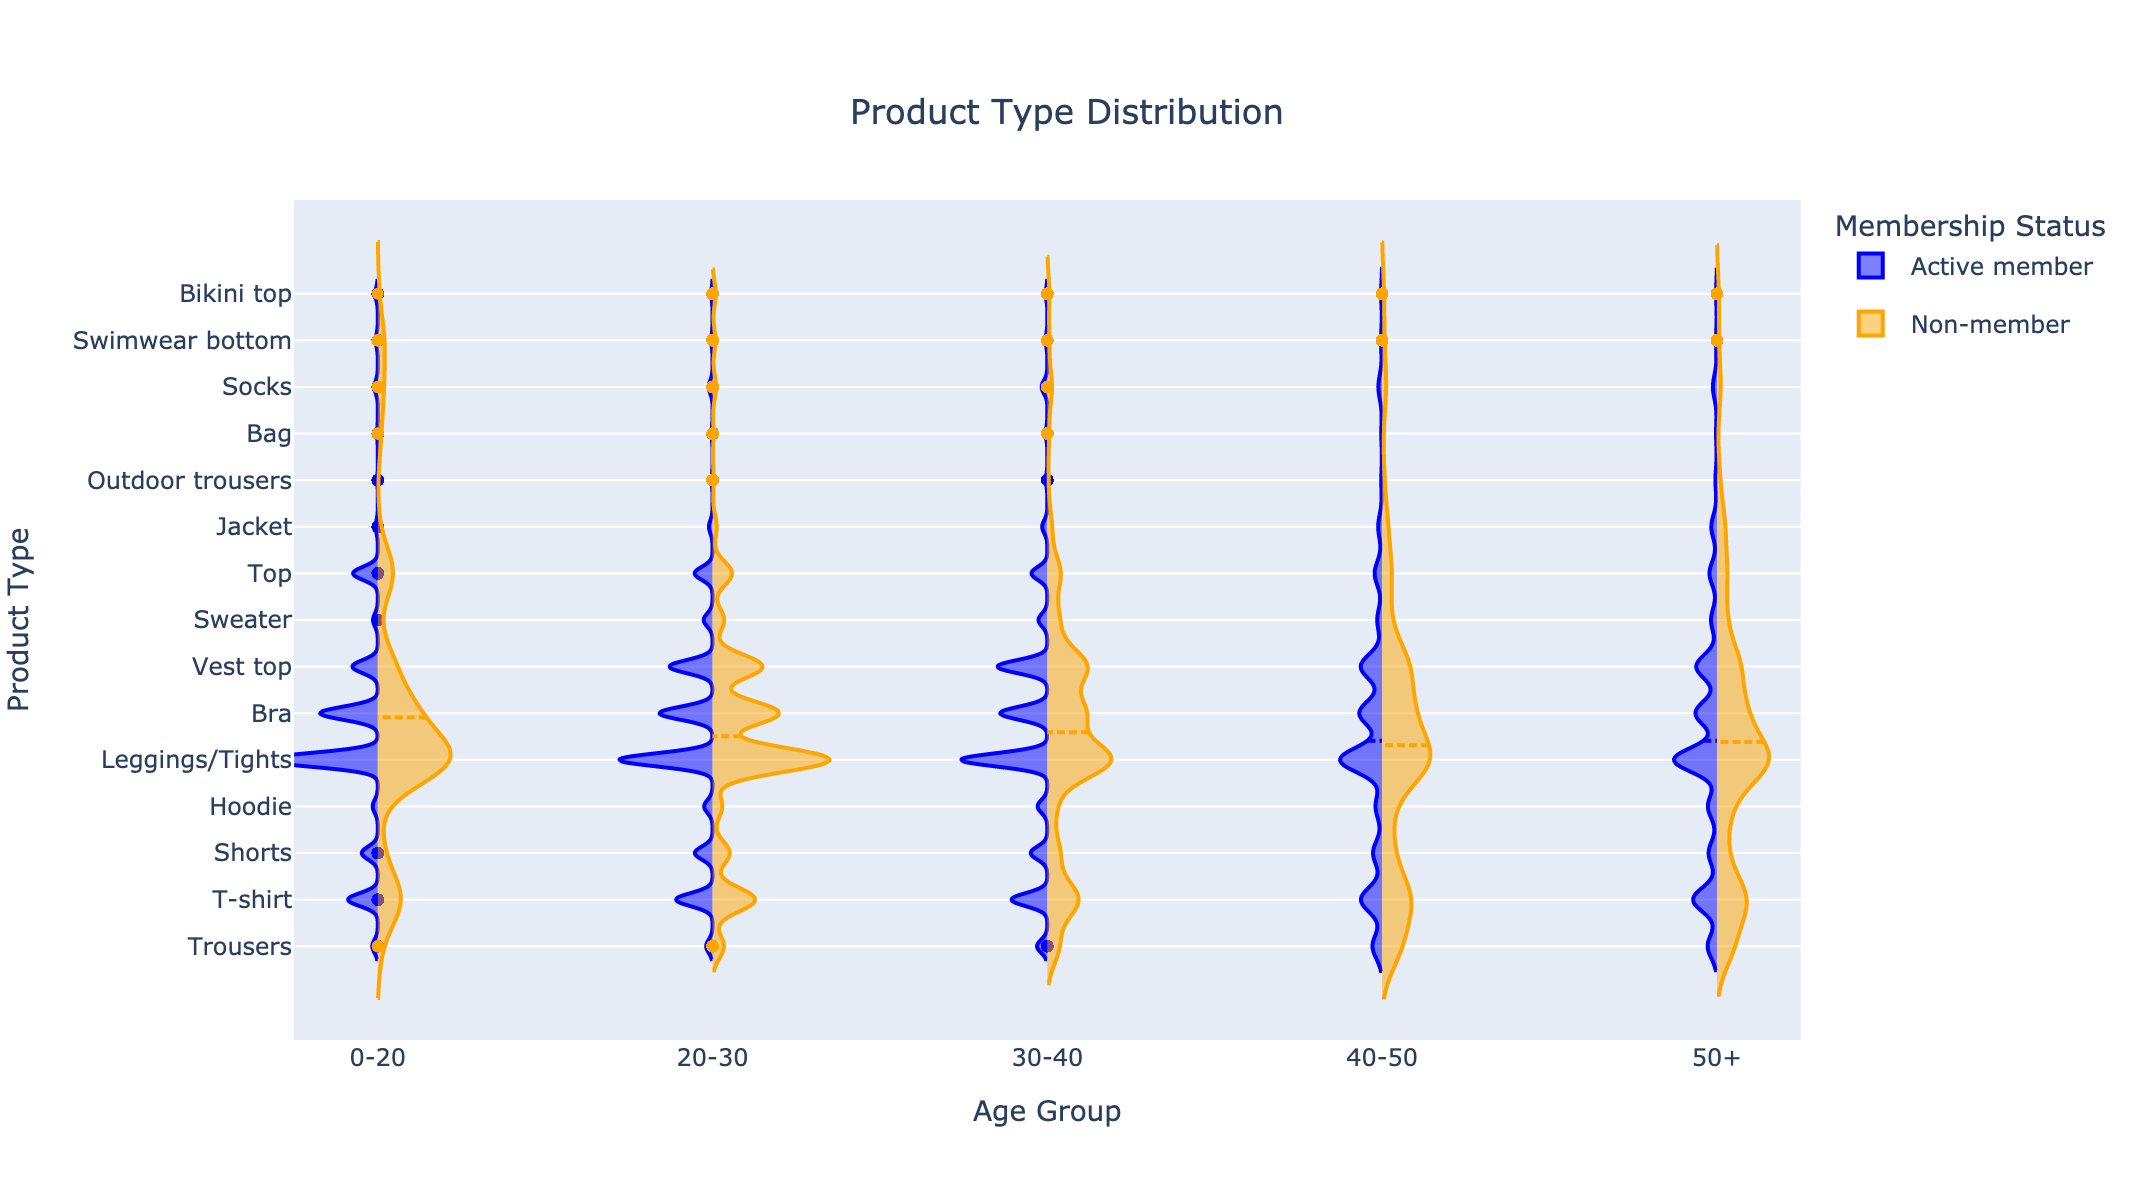

In [3]:
Image(filename='images/product_type_dist.png')